In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix



In [12]:

df = pd.read_csv('SMSSpamCollection.csv', sep='\t', header=None, names=['label', 'message'])

df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

df.head()


,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

# Vectorization
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [10]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)



MultinomialNB()

In [11]:
y_pred = model.predict(X_test_vec)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[961   5]
 [  8 141]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.97      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



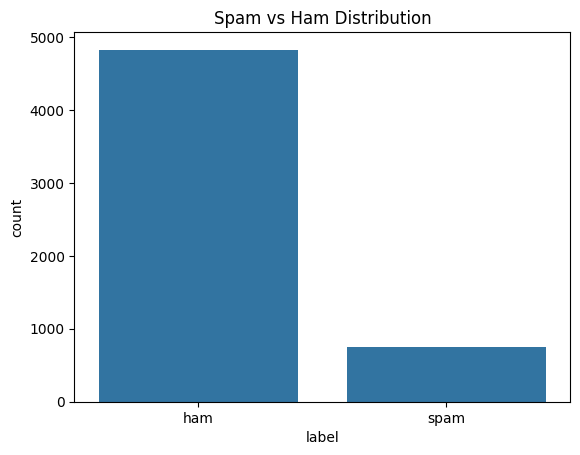

In [13]:
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()
